In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the house data
house = pd.read_csv('./house-data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


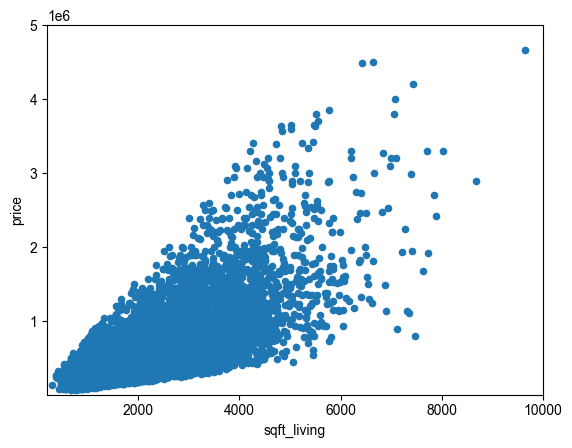

In [4]:
house.plot(kind='scatter', x='sqft_living', y='price')
plt.rcParams["figure.figsize"] = [20, 10]
sns.set_style("darkgrid")
plt.xlim(200,10000)         #Area limit for houses
plt.ylim(10000,5e6)         #Price limit for plot
plt.show()

In [5]:
X_1_sqft = house['sqft_living']
y_price = house['price']
print("X-shape = {} and y-Shape = {}".format(X_1_sqft.shape, y_price.shape))

X-shape = (21613,) and y-Shape = (21613,)


## Create linreg for house sqt and price

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1_sqft, y_price, test_size=0.2, random_state=0)

In [7]:
X_train= X_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [8]:
print(" X train shape: {} - X test shape: {}".format(X_train.shape, X_test.shape))
print(" y train shape: {} - y test shape: {}".format(y_train.shape, y_test.shape))

 X train shape: (17290, 1) - X test shape: (4323, 1)
 y train shape: (17290, 1) - y test shape: (4323, 1)


In [9]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [10]:
print(y_price.mean())
y_pred = linreg.predict(X_test)
print(y_pred.shape)

540088.1417665294
(4323, 1)


In [11]:
print(house['sqft_living'].mean())
print(house['zipcode'].max())

2079.8997362698374
98199


In [12]:
from sklearn.metrics import mean_squared_error
print('RMSE score: {:.3f}'.format(mean_squared_error(y_test, y_pred, squared = False)))
print('MSE score: {:.3f}'.format(mean_squared_error(y_test, y_pred, squared=True)))

RMSE score: 248879.061
MSE score: 61940787124.625


In [13]:
my_props = ['sqft_living', 'bedrooms',  'bathrooms', 'floors', 'zipcode', 'sqft_lot']
X_multi_props = house[my_props]
print(X_multi_props.head(3))
higher_val = house[house.price > 550000]
higher_val.head(3)

   sqft_living  bedrooms  bathrooms  floors  zipcode  sqft_lot
0         1180         3       1.00     1.0    98178    5650.0
1         2570         3       2.25     2.0    98125    7242.0
2          770         2       1.00     1.0    98028   10000.0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,7237550310,20140512T000000,1225000.0,4,4.5,5420,101930.0,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
10,1736800520,20150403T000000,662500.0,3,2.5,3560,9796.0,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925


## Split the multi variable linear regression set

In [14]:
X_train_mutli, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi_props, y_price, test_size=0.2, random_state=0)

In [15]:
lin_reg_multi = LinearRegression().fit(X_train_mutli, y_train_multi)


In [16]:
print('Coefficient: {}'.format(lin_reg_multi.coef_))
print('Inercept: {}'.format(lin_reg_multi.intercept_))

Coefficient: [ 3.20408367e+02 -5.66006330e+04  1.10870935e+04 -2.41800160e+03
  6.17971052e+02 -2.89499029e-01]
Inercept: -60558257.1028406


In [17]:
list(zip(my_props, lin_reg_multi.coef_))

[('sqft_living', 320.4083671874542),
 ('bedrooms', -56600.633030496865),
 ('bathrooms', 11087.093520749459),
 ('floors', -2418.0015958189915),
 ('zipcode', 617.9710516798436),
 ('sqft_lot', -0.28949902865861077)]

In [18]:
y_pred_multi = lin_reg_multi.predict(X_test_multi)
print('RMSE score: {:.3f}'.format(mean_squared_error(y_test_multi, y_pred_multi, squared = False)))
print('MSE score: {:.3f}'.format(mean_squared_error(y_test_multi, y_pred_multi, squared=True)))

RMSE score: 244004.774
MSE score: 59538329555.318
